# Exemplar: Discover what is in your dataset

## Introduction

In this activity, you will discover characteristics of a dataset and use visualizations to analyze the data in **exploratory data analysis (EDA)**.

Unicorn Companies Data Set ="https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies"

## Step 1: Imports

In [72]:
# Import libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import opendatasets as od

### Load the dataset into a DataFrame

The dataset provided is in the form of a csv file named `Unicorn_Companies.csv` and contains a subset of data on unicorn companies. The data will be loaded from the Kaggle link. 



In [73]:
# Load data from the csv file into a DataFrame
companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2: Data exploration


In [74]:
# Display the first 10 rows of the data
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


- The "Date Joined" column represents when the company became a "unicorn," reaching one billion dollars in valuation.
- The "Select Investors" column represents the top investors in the company.

In [75]:
# Size of the dataset
companies.size

10740

- The size of the dataset is 10740. This means that there are 10740 values in total across the whole dataset.

In [76]:
# Shape of the dataset

companies.shape

(1074, 10)

- According to this dataset, there are 1074 unicorn companies as of March 2022, and this dataset also shows 10 aspects of each company. 

### Get basic information about the dataset

To further understand what the dataset entails, get basic information about the dataset, including the data type of values in each column. There is more than one way to approach this task.

In [77]:
# Get information
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


- `Dtype` is listed as `int64` in the `Year Founded` column. This means that the year a company was founded is represented as an integer. 
- `Dtype` is listed as `object` for the `Date Joined` column. This means that the date a company became a unicorn is represented as an object. 
- There are some missing data in `City` and `Select Investors` columns but since they are not that realted, we will keep them at the time being.

## Step 3: Statistical tests

Finding descriptive statistics and structure your dataset.

In [78]:
### Descriptive statistics

companies.describe().round(2)

,Year Founded
count,1074.0
mean,2012.9
std,5.7
min,1919.0
25%,2011.0
50%,2014.0
75%,2016.0
max,2021.0


- The minimum value in the Year Founded column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.
- The maximum value in the Year Founded column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

### Convert the `Date Joined` column to datetime
 Having "date joined" in datetime form would help to complete tasks related to dates and times.

In [79]:
# onvert Date Joined column to datetime 
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

In [80]:
# Confirm that the update actually took place
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


### Create a `Year Joined` column

Extract the year component from the `Date Joined` column and add those year components into a new column to keep track of each company's year joined.

In [81]:
# Extract year component from Date Joined column
companies["Year Joined"] = companies["Date Joined"].dt.year

In [82]:
# Confirm that the new column did get added
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


## Step 4: Results and evaluation

### Take a sample of the data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But you may encounter scenarios in the future where you will need to take a sample of the data due to time and resource limitations. For the purpose of developing your skills around sampling.

In [83]:
# Sample the data
companies_sample = companies.sample(n = 50, random_state = 42)

### Visualize the time it took companies to reach unicorn status


In [84]:
# Prepare data for plotting
companies_sample["Years Till Unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "Years Till Unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="Years Till Unicorn")
          )
grouped

,Years Till Unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


Now, create a bar plot.

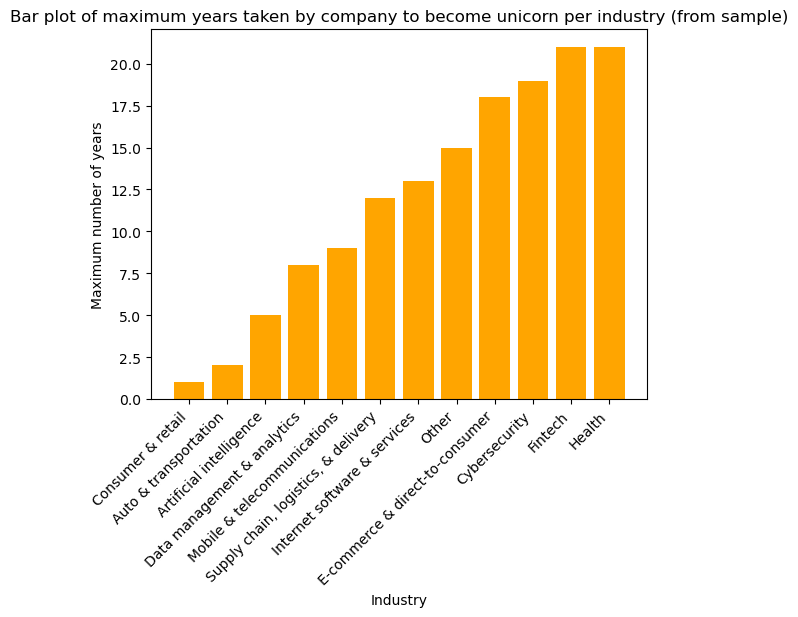

In [85]:
# Create bar plot
plt.bar(grouped.index, grouped["Years Till Unicorn"], color = "orange")
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum number of years")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

- This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

### Visualize the maximum unicorn company valuation per industry

In [86]:
# Create a column representing company valuation as numeric data

# Create new column
companies_sample['Valuation Billions'] = companies_sample['Valuation']
companies_sample['Valuation Billions'] = companies_sample['Valuation Billions'].str.replace('$', '').str.replace('B', '').astype('int')
companies_sample.head()

C:\Users\AMEEN\AppData\Local\Temp\ipykernel_23828\2049632298.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  companies_sample['Valuation Billions'] = companies_sample['Valuation Billions'].str.replace('$', '').str.replace('B', '').astype('int')


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Years Till Unicorn,Valuation Billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


Now, prepare the data for modeling by performing the necessary calculations on it.

In [87]:
# Prepare data for modeling
grouped = (companies_sample[["Industry", "Valuation Billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by="Valuation Billions")
          )
grouped

,Valuation Billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


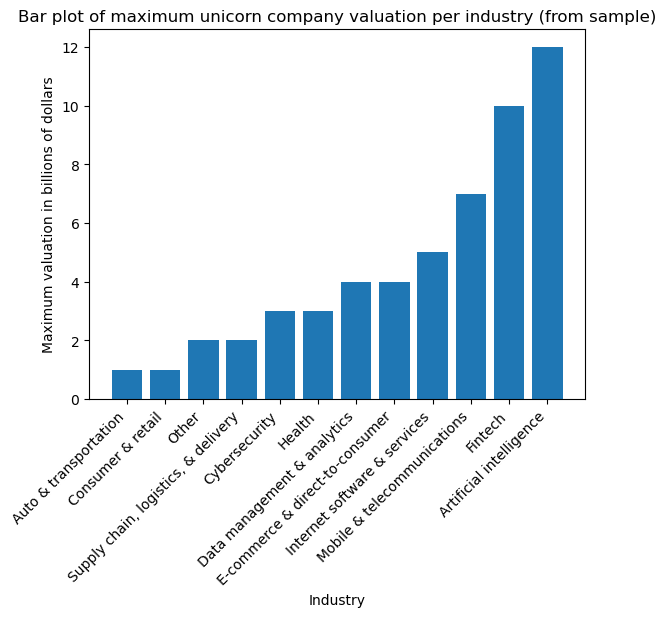

In [90]:
# Create bar plot
plt.bar(grouped.index, grouped["Valuation Billions"])
plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

- This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Auto & transportation, and Consumer & retail industries.

## Considerations
**What findings would you share with others?**

- There are 1074 unicorn companies represented in this dataset.
- Some companies took longer to reach unicorn status but have accrued high valuation as of March 2022. Companies could take longer to achieve unicorn status for a number of reasons, including requiring more funding or taking longer to develop a business model. 

**What recommendations would you share with stakeholders based on these findings?**

It may be helpful to focus more on industry specifics. Next steps to consider:
- Identify the main industries that the investing firm is interested in investing in. 
- Select a subset of this data that includes only companies in those industries. 
- Analyze that subset more closely. Determine which companies have higher valuation but do not have as many investors currently. They may be good candidates to consider investing in. 